In [73]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.cm as am

In [74]:
#importing dataset
path = '/content/drive/MyDrive/train.csv'
data_train = pd.read_csv(path)


data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [75]:
data_train.shape

(14999, 9)

In [76]:
#into numerical values
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train['category']=data_train['category'].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [77]:
#removing character F in data
data_train=data_train[data_train.views!='F']
data_train=data_train[data_train.comment!='F']
data_train=data_train[data_train.dislikes!='F']
data_train=data_train[data_train.likes!='F']
data_train.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [78]:
#converting into numerical data
data_train['views']=pd.to_numeric(data_train['views'])
data_train['likes']=pd.to_numeric(data_train['likes'])
data_train['dislikes']=pd.to_numeric(data_train['dislikes'])
data_train['category']=pd.to_numeric(data_train['category'])
data_train['comment']=pd.to_numeric(data_train['comment'])
column_vidid = data_train['vidid']
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [79]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train["duration"] = le.fit_transform(data_train["duration"])
data_train["vidid"] = le.fit_transform(data_train["vidid"])
data_train["published"] = le.fit_transform(data_train["published"])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [80]:
# Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if (i=="H"):
        h = mm
        mm = ''
      elif (i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if (h==''):
    h = '00'
  if (m == ''):
    m = '00'
  if (s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv(path)
mp = pd.read_csv(path)["duration"]
time = mp.apply(checki)
def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)
data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


# **Visualization**

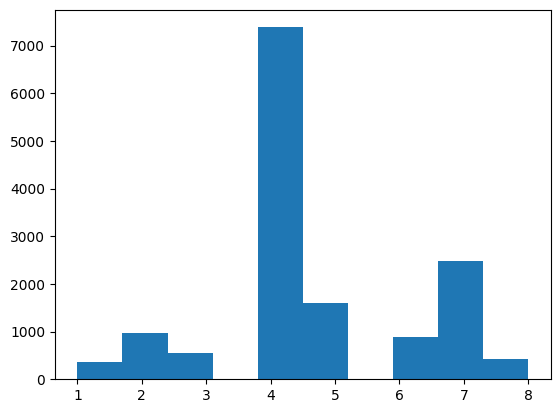

In [81]:
plt.hist(data_train['category'])
plt.show()

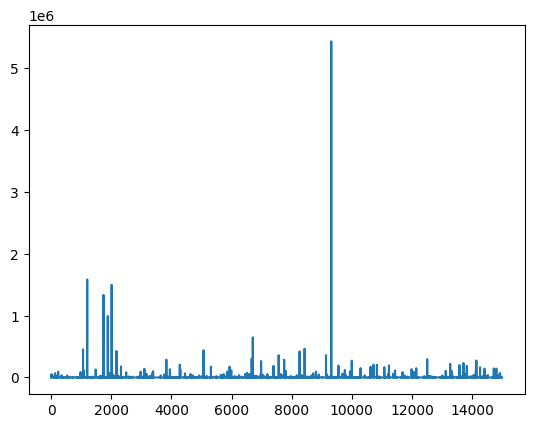

In [82]:
plt.plot(data_train['adview'])
plt.show()

In [83]:
data_train = data_train[data_train['adview']<2000000]

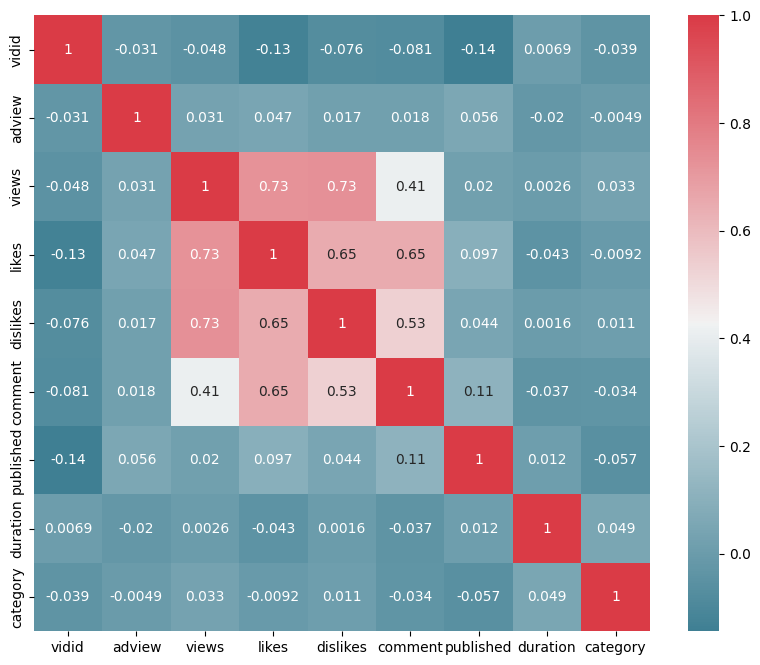

In [84]:
import seaborn as sns

f, ax= plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype = bool), cmap = sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax ,annot=True )
plt.show()

In [85]:
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train = data_train.drop(["adview"],axis=1)
data_train = data_train.drop(["vidid"],axis=1)
data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

In [87]:
X_train.shape

(11708, 7)

In [88]:
X_test.shape

(2928, 7)

In [89]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train.mean()

0.1739096800320488

In [90]:
from sklearn import metrics
def print_error(X_test,y_test,model):
  y_pred = model.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [91]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)
print_error(X_test,y_test,lr)



Mean Absolute Error: 3707.3780058245316
Mean Squared Error: 835663131.1210335
Root Mean Squared Error: 28907.83857573986


In [92]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
print_error(X_test,y_test,dt)

Mean Absolute Error: 2873.522882513661
Mean Squared Error: 1202179587.6157787
Root Mean Squared Error: 34672.461516537565


In [93]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
rf = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
rf.fit(X_train,y_train)
print_error(X_test,y_test,rf)


<ipython-input-93-3122f257a706>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


Mean Absolute Error: 3370.154709158323
Mean Squared Error: 708136002.2729594
Root Mean Squared Error: 26610.82490778817


In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
print_error(X_test,y_test,svr)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
import keras
from keras.layers import Dense

ann = keras.models.Sequential([
    Dense(6,activation='relu' ,input_shape=X_train.shape[1:]),
    Dense(6,activation='relu'),
    Dense(1)
])
optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer = optimizer,loss=loss,metrics=['mean_squared_error'])
history = ann.fit(X_train,y_train,epochs=100)

ann.summary()

print_error(X_train,y_train,ann)

In [ ]:
score = lr.score(X_test,y_test)
print("Linear Regression: ", score)
score = dt.score(X_test,y_test)
print("decision tree: ",score)
score = rf.score(X_test,y_test)
print("random forest: ",score)
score = svr.score(X_test,y_test)
print("support vector machine: ",score)


In [ ]:
import joblib
joblib.dump(rf,'rf_Youtube_adview_Prediction.pkl')


In [ ]:
ann.save('ann_Youtube_adview_Prediction.h5')

In [ ]:
test_data = pd.read_csv('/content/test.csv')
test_data.head()

In [ ]:
#into numerical values
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
test_data['category']=test_data['category'].map(category)
test_data.head()

In [ ]:
test_data = test_data[test_data.views!='F']
test_data = test_data[test_data.comment!='F']
test_data = test_data[test_data.dislikes!='F']
test_data = test_data[test_data.likes!='F']
test_data.head()

In [ ]:
#converting into numerical data
test_data['views']=pd.to_numeric(test_data['views'])
test_data['likes']=pd.to_numeric(test_data['likes'])
test_data['dislikes']=pd.to_numeric(test_data['dislikes'])
test_data['category']=pd.to_numeric(test_data['category'])
test_data['comment']=pd.to_numeric(test_data['comment'])
column_vidid = test_data['vidid']
test_data.head()

In [ ]:

test_data["duration"] = le.fit_transform(test_data["duration"])
test_data["vidid"] = le.fit_transform(test_data["vidid"])
test_data["published"] = le.fit_transform(test_data["published"])
test_data.head()

In [ ]:
train=pd.read_csv('/content/test.csv')
mp = pd.read_csv('/content/test.csv')["duration"]
time = mp.apply(checki)


time1=time.apply(func_sec)
test_data["duration"]=time1
test_data.head()

In [ ]:
data_testing=test_data.drop(["vidid"],axis=1)
scaler = MinMaxScaler()
X_test = scaler.fit_transform(data_testing)
X_test.shape

In [ ]:
joblib_LR_model = joblib.load("/content/rf_Youtube_adview_Prediction.pkl")

# Predict the Labels using the reloaded Model
Ypredict = joblib_LR_model.predict(X_test)
Ypredict

In [ ]:
test_data["Predicted_adview"] = Ypredict
test_data.to_csv("Predictions_Adview.csv")